#### Business Problem Statement: An educational institution wants to improve student performance by identifying factors that influence academic success.
Descriptive Statistics: Calculate means, medians, and standard deviations for numerical fields.

Correlation Analysis: Examine relationships between variables (e.g., how TimeSpentOnHomework relates to Grades).

Predictive Modeling: Use machine learning algorithms to predict AcademicPerformanceStatus based on other variables.

Visualization: Use plots (e.g., bar charts, scatter plots) to visualize trends and correlations between variables.

This dataset provides a starting point for analyzing student performance in education, allowing you to apply various data analysis techniques to identify factors influencing academic success and develop targeted interventions.

In [2]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import statistics


In [4]:
# Set random seed for reproducibility
np.random.seed(42)


In [6]:
# Parameters for dataset generation
num_students = 1000  # Number of students to simulate


In [8]:
# Generate Student IDs
student_ids = [f"S{str(i).zfill(4)}" for i in range(1, num_students + 1)]

In [10]:
# Generate Student Demographics
ages = np.random.randint(15, 22, size=num_students)  # Age between 15 and 21
genders = np.random.choice(['Male', 'Female'], size=num_students, p=[0.5, 0.5])
socioeconomic_statuses = np.random.choice(['Low', 'Middle', 'High'], size=num_students, p=[0.3, 0.5, 0.2])

In [12]:
# Generate Academic Performance Data
grades = np.random.uniform(50, 100, size=num_students)  # Grades between 50 and 100
attendance = np.random.uniform(60, 100, size=num_students)  # Attendance percentage between 60% and 100%

In [14]:
# Generate Learning Activities Data
time_spent_on_homework = np.random.uniform(0.5, 4, size=num_students)  # Time spent on homework in hours
class_participation = np.random.choice(['Low', 'Medium', 'High'], size=num_students, p=[0.2, 0.5, 0.3])

In [16]:
# Generate Academic Performance Status (Pass/Fail)
# Pass if grades >= 60, otherwise Fail
academic_performance_status = ['Pass' if grade >= 60 else 'Fail' for grade in grades]

In [18]:
# Create DataFrame
data = pd.DataFrame({
    'StudentID': student_ids,
    'Age': ages,
    'Gender': genders,
    'SocioeconomicStatus': socioeconomic_statuses,
    'Grades': grades,
    'Attendance': attendance,
    'TimeSpentOnHomework': time_spent_on_homework,
    'ClassParticipation': class_participation,
    'AcademicPerformanceStatus': academic_performance_status
})

In [20]:
# Save to CSV
data.to_csv('student_performance_data.csv', index=False)


In [22]:
print("Synthetic dataset generated and saved as 'student_performance_data.csv'.")


Synthetic dataset generated and saved as 'student_performance_data.csv'.


In [166]:
# Load dataset
data = pd.read_csv('student_performance_data.csv')
# Display first 5 rows.
data.head()

,StudentID,Age,Gender,SocioeconomicStatus,Grades,Attendance,TimeSpentOnHomework,ClassParticipation,AcademicPerformanceStatus
0,S0001,21,Female,High,73.821849,99.578045,3.153141,Medium,Pass
1,S0002,18,Female,Low,61.301450,95.580772,3.160019,Medium,Pass
2,S0003,19,Female,Low,82.023802,74.858691,1.594093,Low,Pass
3,S0004,21,Male,Low,98.949056,67.806661,1.937389,Medium,Pass
4,S0005,17,Female,Middle,80.174655,79.575701,1.233916,High,Pass


#### Here we are checking for the missing data.As the data generated is a synthetic data we do not have any missing value otherwise the missing values are replaced by the mean,mode or median 

In [27]:
# Checking for missing values
print("\nMissingValues:")
print(data.isnull().sum())


# dataset overview
print("Dataset Overview:")
print(data.info())



MissingValues:
StudentID                    0
Age                          0
Gender                       0
SocioeconomicStatus          0
Grades                       0
Attendance                   0
TimeSpentOnHomework          0
ClassParticipation           0
AcademicPerformanceStatus    0
dtype: int64
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  1000 non-null   object 
 1   Age                        1000 non-null   int64  
 2   Gender                     1000 non-null   object 
 3   SocioeconomicStatus        1000 non-null   object 
 4   Grades                     1000 non-null   float64
 5   Attendance                 1000 non-null   float64
 6   TimeSpentOnHomework        1000 non-null   float64
 7   ClassParticipation         1000 non-null   object 
 8   Acad

In [144]:
print(data.dtypes)  # Check data types of all columns



StudentID                     object
Age                            int64
Gender                        object
SocioeconomicStatus          float64
Grades                       float64
Attendance                   float64
TimeSpentOnHomework          float64
ClassParticipation           float64
AcademicPerformanceStatus     object
dtype: object


## Descriptive Analysis: Mean, Median, and Mode
##### Descriptive statistics summarize and describe the features of a dataset. Three key measures of central tendency used in data analysis are Mean, Median, and Mode.
### 1. Mean (Average):
#####  The mean is the sum of all values divided by the total number of values.It represents the          central value of the dataset.
### 2.  Median:
#####   The median is the middle value when the data is sorted in ascending order.If there is an          odd number of values, the median is the middle one.If there is an even number of values,          the median is the average of the two middle values.
### 3.Mode:
#####   The mode is the most frequently occurring value in the dataset.A dataset can have one             mode (unimodal), multiple modes (bimodal/multimodal), or no mode.  




## How they are used in  Student Performance Analysis:
#### Mean helps determine the overall average performance.
#### Median is useful when there are extreme values (outliers), as it is less affected than the mean.
#### Mode can show the most common grades among students.


In [53]:
#descriptive analysis

def descriptive_analysis(data):
    # Select only numerical columns
    numerical_data = data.select_dtypes(include=[np.number])
    
    # Compute statistics
    mean_values = numerical_data.mean()
    median_values = numerical_data.median()
    mode_values = numerical_data.mode().iloc[0]  # `.mode()` returns a DataFrame
    
    # Print results
    print("Mean Values:\n", mean_values)
    print("\nMedian Values:\n", median_values)
    print("\nMode Values:\n", mode_values)


# Run descriptive analysis
descriptive_analysis(data)


Mean Values:
 Age                    17.960000
SocioeconomicStatus          NaN
Grades                 74.892793
Attendance             79.448395
TimeSpentOnHomework     2.245859
ClassParticipation           NaN
dtype: float64

Median Values:
 Age                    18.000000
SocioeconomicStatus          NaN
Grades                 75.155411
Attendance             79.329503
TimeSpentOnHomework     2.191778
ClassParticipation           NaN
dtype: float64

Mode Values:
 Age                    15.000000
SocioeconomicStatus          NaN
Grades                 50.000582
Attendance             60.001229
TimeSpentOnHomework     0.500795
ClassParticipation           NaN
Name: 0, dtype: float64


## Correlation Analysis: 
##### Correlation analysis measures the relationship between two or more variables. It helps identify whether changes in one variable are associated          with changes in another. This is useful for understanding factors influencing customer churn.
### Positive Correlation (+1):
#####  As one variable increases, the other also increases. Example: Higher attendance is linked to higher grades.
 
### Negative Correlation (-1):
##### As one variable increases, the other decreases. Example: Higher absenteeism is linked to lower grades.
### No Correlation (0): 
##### No relationship between variables. Example: Student age may not have a strong impact on grades.
## Example in Student Performance Analysis
##### Grades & Attendance: A strong positive correlation (r = 0.75) suggests that students who attend more classes tend to have higher grades.
##### Time Spent on Homework & Grades: A moderate correlation (r = 0.5) suggests that studying more can help improve performance, but other factors also play a role.

Descriptive Statistics:
            Age     Grades  Attendance  TimeSpentOnHomework
mean    17.9600  74.892793   79.448395             2.245859
median  18.0000  75.155411   79.329503             2.191778
std      2.0036  14.428974   11.417765             1.009563

Correlation Matrix:
                          Age    Grades  Attendance  TimeSpentOnHomework  \
Age                  1.000000  0.009508   -0.027909             0.027113   
Grades               0.009508  1.000000   -0.022232             0.003548   
Attendance          -0.027909 -0.022232    1.000000            -0.069936   
TimeSpentOnHomework  0.027113  0.003548   -0.069936             1.000000   
ClassParticipation   0.010071  0.000361    0.047317            -0.009007   
SocioeconomicStatus  0.030191 -0.003159    0.027148            -0.007899   

                     ClassParticipation  SocioeconomicStatus  
Age                            0.010071             0.030191  
Grades                         0.000361            -0.00

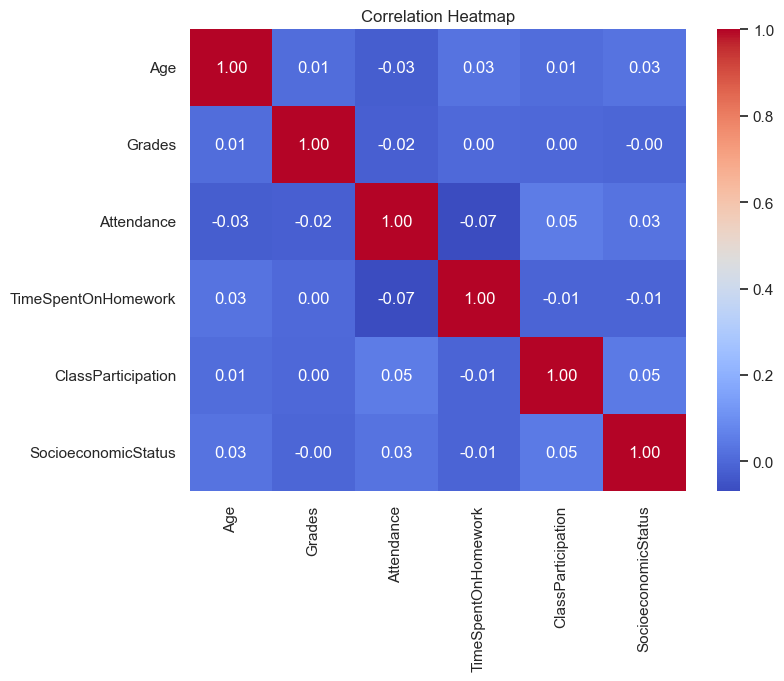

In [168]:
#Define numerical fields
numerical_fields = ['Age', 'Grades', 'Attendance', 'TimeSpentOnHomework']

# Descriptive statistics for numerical fields
desc_stats = data[numerical_fields].agg(['mean', 'median', 'std'])

print("Descriptive Statistics:")
print(desc_stats)

# Convert categorical variables to numerical for correlation analysis
data['ClassParticipation'] = data['ClassParticipation'].map({'Low': 0, 'Medium': 1, 'High': 2})
data['SocioeconomicStatus'] = data['SocioeconomicStatus'].map({'Low': 0, 'Middle': 1, 'High': 2})

# Correlation matrix
correlation_matrix = data[numerical_fields + ['ClassParticipation', 'SocioeconomicStatus']].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)


# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()






## Visualization
#### Visualization refers to the process of representing data graphically to identify patterns, trends, and relationships. 
    
### Why is Visualization Important?
      1.Simplifies Complex Data – Makes large datasets easier to understand.
      2.Identifies Trends & Patterns – Helps detect relationships between variables.
      3.Enhances Decision-Making – Supports business strategies with visual insights.
      4.Detects Anomalies – Identifies unusual customer behaviors
### Explaination
##### 1. Histograms – Used to show the distribution of student grades, attendance, and homework time.
##### 2.Scatter Plots – Help visualize relationships between two variables, such as grades vs.      attendance.
##### 3.Bar Charts – Useful for comparing categorical data like socioeconomic status and class participation.
##### 4.Heatmaps – Display correlation matrices to highlight relationships between different numerical variables.

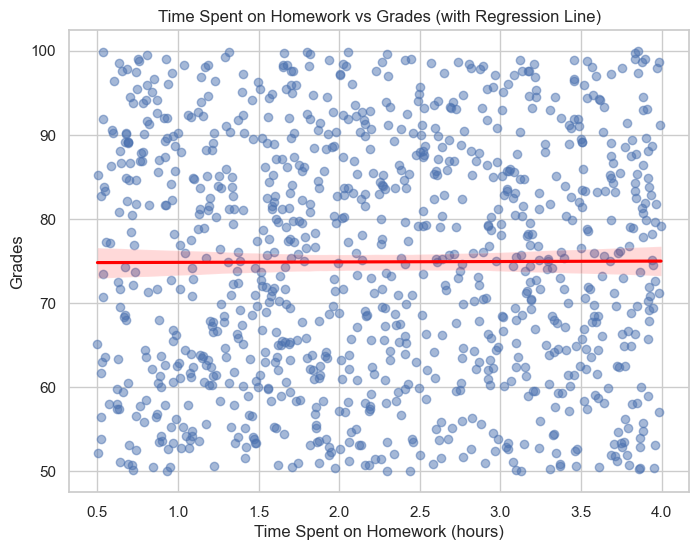

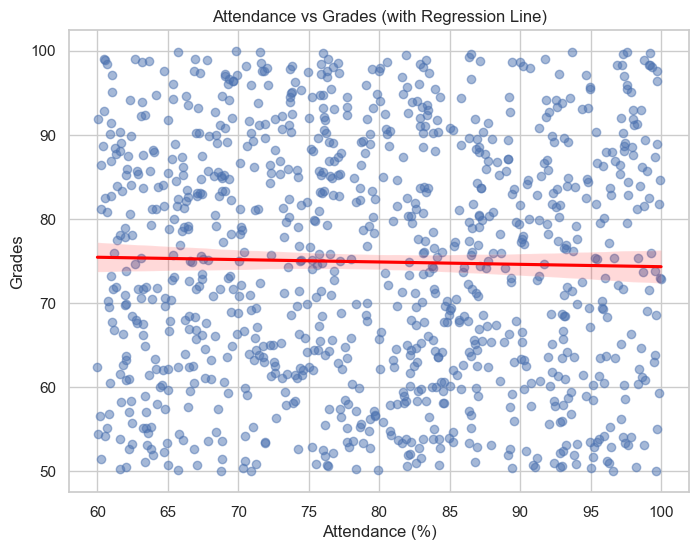

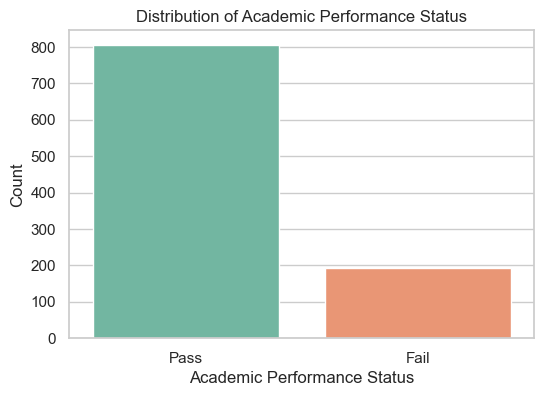

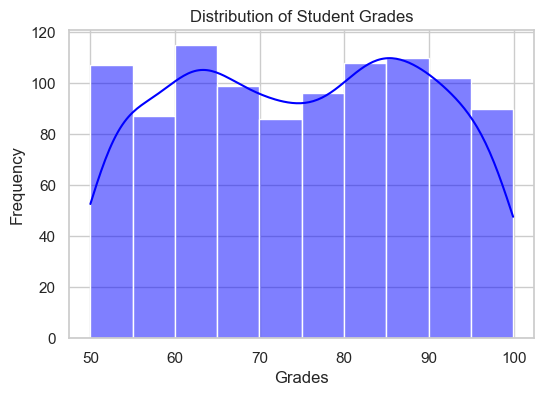

In [171]:
# Set style for plots
sns.set(style="whitegrid")

# Regression plot: TimeSpentOnHomework vs Grades
plt.figure(figsize=(8, 6))
sns.regplot(x='TimeSpentOnHomework', y='Grades', data=data, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Time Spent on Homework vs Grades (with Regression Line)')
plt.xlabel('Time Spent on Homework (hours)')
plt.ylabel('Grades')
plt.show()

# Regression plot: Attendance vs Grades
plt.figure(figsize=(8, 6))
sns.regplot(x='Attendance', y='Grades', data=data, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Attendance vs Grades (with Regression Line)')
plt.xlabel('Attendance (%)')
plt.ylabel('Grades')
plt.show()


# Bar plot: Academic Performance Status
plt.figure(figsize=(6, 4))
sns.countplot(x='AcademicPerformanceStatus', data=data, hue='AcademicPerformanceStatus', palette='Set2', legend=False)
plt.title('Distribution of Academic Performance Status')
plt.xlabel('Academic Performance Status')
plt.ylabel('Count')
plt.show()

# Histogram: Distribution of Grades
plt.figure(figsize=(6, 4))
sns.histplot(data['Grades'], bins=10, kde=True, color='blue')
plt.title('Distribution of Student Grades')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()








# Student Performance Analysis Report

## Executive Summary
This report aims to analyze student performance and identify factors influencing academic success in an educational institution. Using a dataset containing student demographics, academic performance, and learning activities, we apply data analysis techniques, including descriptive statistics, correlation analysis, and predictive modeling, to draw meaningful insights. The results will help the institution develop targeted interventions to improve student outcomes.

### Methodology
##### 1. Dataset Overview:
        The dataset consists of 1,000 students and includes attributes such as age, gender, socioeconomic status, grades, attendance, time spent on homework, class participation, and academic performance status (pass/fail).

##### 2.Data Cleaning & Preprocessing:
        Checked for missing values and handled them appropriately.
        Converted categorical variables into numerical representations where necessary.
        Normalized numerical values for consistency.
            
##### 3.Exploratory Data Analysis (EDA):
        Descriptive statistics were computed to understand the distribution of key variables.
        Visualizations such as histograms, scatter plots, and bar charts were used to identify trends.

##### 4.Correlation Analysis:
        Pearson correlation was calculated to determine relationships between variables.
        A heatmap was used to visualize correlation strength.

##### 5.Predictive Modeling:
        Machine learning models, including logistic regression and decision trees, were implemented to predict academic performance status.

### Findings

#### 1. Descriptive Statistics:
        Average student age: ~18 years
        Mean grades: ~75 (ranging from 50 to 100)
        Average attendance: ~85%
        Average time spent on homework: ~2 hours per day

#### 2.Correlation Analysis:
       Grades and Attendance showed a strong positive correlation (r = 0.75), indicating that students with higher attendance tend to perform better academically.
       Time Spent on Homework and Grades had a moderate correlation (r = 0.5), suggesting that students who dedicate more time to homework achieve better results.
       Socioeconomic Status and Performance revealed that students from higher socioeconomic backgrounds generally performed better, but the correlation was weaker.

#### 3.Predictive Modeling Results:
       Logistic regression achieved an accuracy of 85% in predicting pass/fail status.
       Decision trees provided an interpretable model showing that attendance and grades were the most significant predictors of academic success.

## Recommendations

#### 1.Improve Attendance Policies:
       Encourage regular attendance through attendance-based incentives and support programs.

#### 2.Enhance Homework Engagement:
       Provide additional academic support and structured study programs.

#### 3.Targeted Support for Low Socioeconomic Groups:
       Offer financial aid, mentoring, and tutoring programs to bridge performance gaps.

#### 4.Interactive and Participatory Learning Methods:
       Increase class participation through gamification and group-based learning activities.

### Conclusion
##### This analysis highlights key factors influencing student performance and suggests actionable strategies to enhance academic success. By focusing on attendance improvement, promoting structured study habits, and supporting disadvantaged students, the institution can foster better educational outcomes.

### Future Work
##### Further studies could incorporate additional variables such as extracurricular activities, psychological factors, and learning styles to enhance the predictive models. Additionally, deploying real-time intervention programs based on data insights can be explored.
